In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

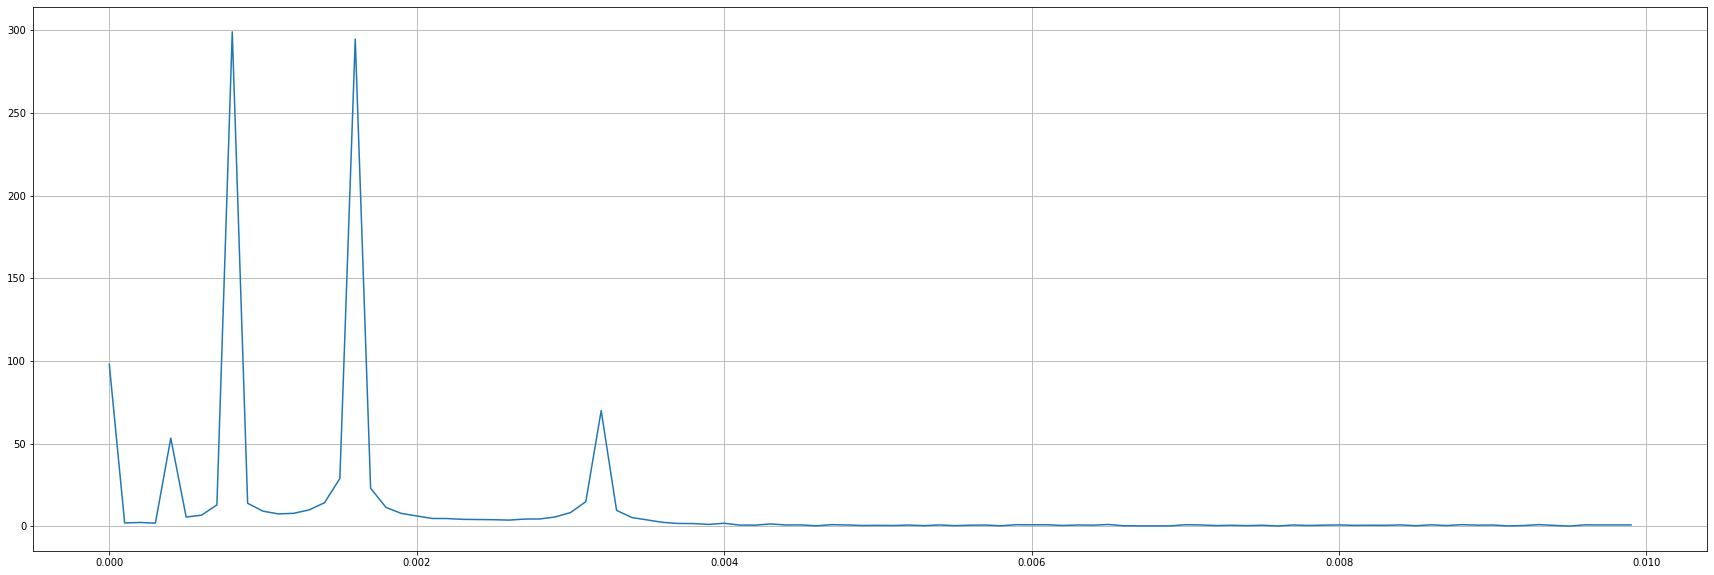

In [29]:
df=pd.read_csv("astrometry_data.csv")
time=df[df.columns[0]]
vel=df[df.columns[1]]
fp=np.fft.rfft(vel)
ff=np.fft.rfftfreq(len(vel))
plt.figure(figsize=(30,10))

plt.plot(ff[0:100],np.abs(fp)[0:100])
plt.grid()

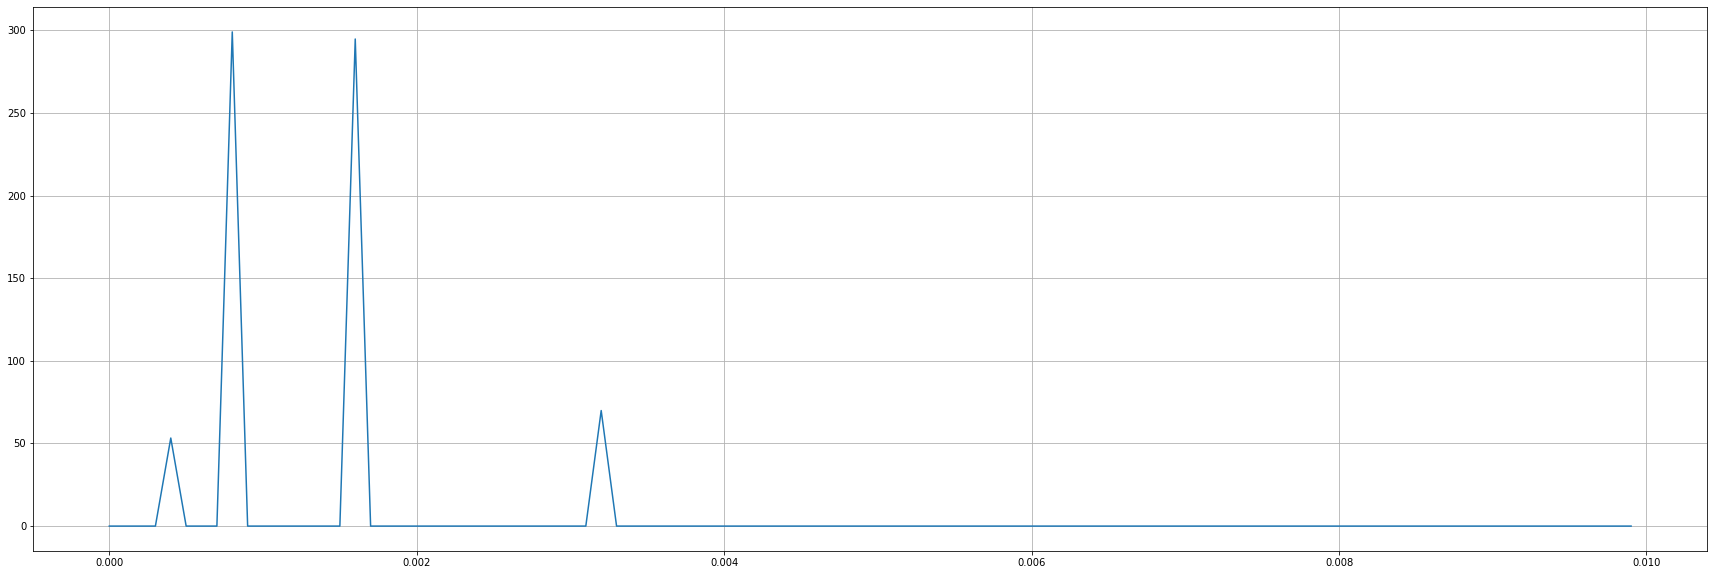

In [30]:
idx=np.where(np.abs(fp)<50)
fp[idx]=0
fp[0]=0

plt.figure(figsize=(30,10))

plt.plot(ff[0:100],np.abs(fp)[0:100])
plt.grid()

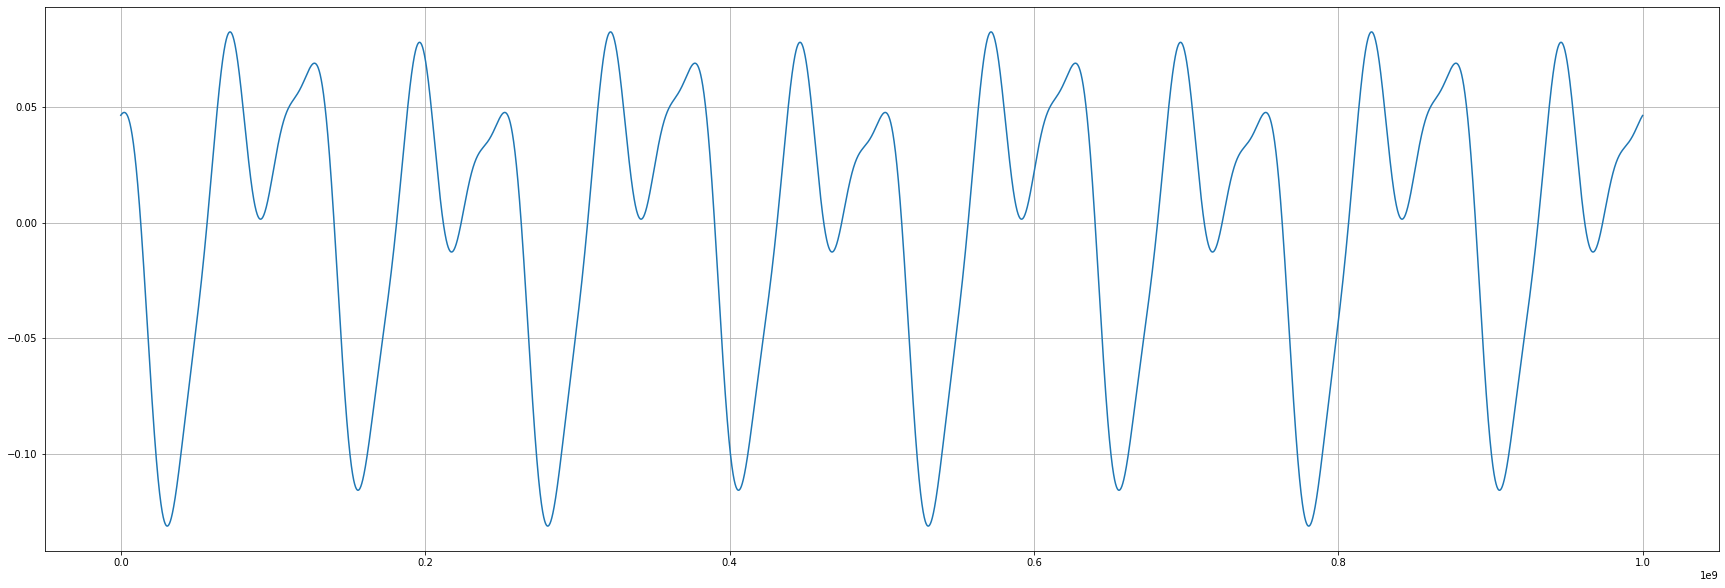

In [31]:
new_vel=np.fft.irfft(fp)
plt.figure(figsize=(30,10))

plt.plot(time,new_vel)
plt.grid()

In [32]:
index=np.where(np.abs(fp)>50)[0]
index


array([ 4,  8, 16, 32], dtype=int64)

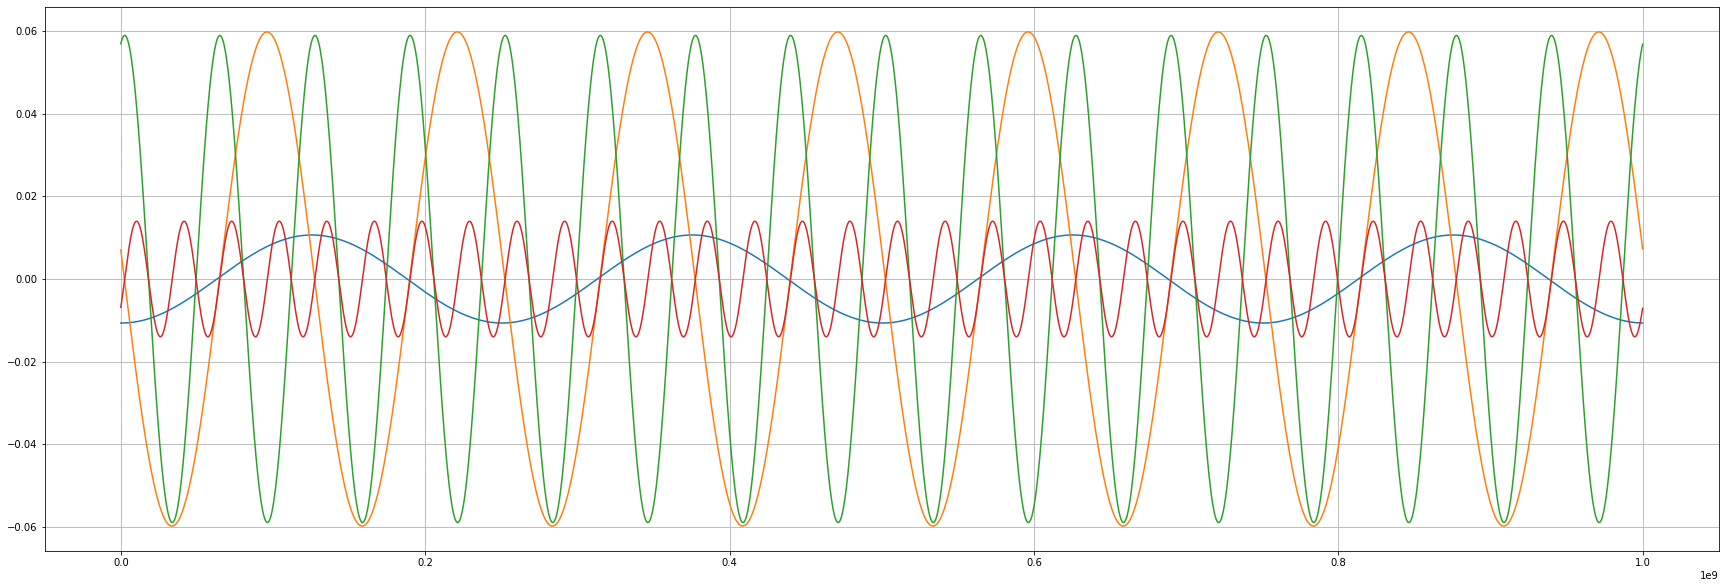

In [33]:
plt.figure(figsize=(30,10))
for i in range(0,4):
    _fp=fp.copy()
    _idx=np.where(np.abs(_fp)!=np.abs(_fp[index[i]]))
    _fp[_idx]=0
    _inv=np.fft.irfft(_fp)
    

    plt.plot(time,_inv)
plt.grid()

In [36]:
from scipy.signal import argrelextrema
M=1e30
G=6.67*1e-11
for i in range(0,4):
    _fp=fp.copy()
    _idx=np.where(np.abs(_fp)!=np.abs(_fp[index[i]]))
    _fp[_idx]=0
    _inv=np.fft.irfft(_fp)
    maximas=argrelextrema(_inv,np.greater)[0]
    print("exoplanet number:",i+1)
    t=[]
    t=[time[maximas[x+1]]-time[maximas[x]]for x in range(len(maximas)-1)]
    sum=0
    for j in range(0,len(maximas)-1):
        sum=sum+t[j]
    average=sum/(len(maximas)-1)
    years=average/(3600*24*365)

    omega=(np.pi)*2/average
    r=np.cbrt(G*M/(omega*omega))
    AU=r/(1.49*1e11)

    R=np.amax(_inv)/omega
    m=(M*R)/r
    m=m/(6*1e24)

    print("mass of exoplanet:",round(m,3),"earth masses")
    print("radius of revolution:",round(AU,3),"AU")
    print("revolution period:",round(years,3),"earth years")
    print(" ")

    




exoplanet number: 1
mass of exoplanet: 0.15 earth masses
radius of revolution: 3.172 AU
revolution period: 7.927 earth years
 
exoplanet number: 2
mass of exoplanet: 0.666 earth masses
radius of revolution: 1.998 AU
revolution period: 3.964 earth years
 
exoplanet number: 3
mass of exoplanet: 0.521 earth masses
radius of revolution: 1.259 AU
revolution period: 1.982 earth years
 
exoplanet number: 4
mass of exoplanet: 0.098 earth masses
radius of revolution: 0.793 AU
revolution period: 0.991 earth years
 
